## Perdiction of Gas Production 

Code by: Vahid Mohammadnia

Gas production of Well_X05 by poly nomical Regression model.

## Inserting the input data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Raw_Data = pd.read_excel("D:/37-Oil_projct/data2.xlsx")  # give the right address to input data
well_X05 = Raw_Data.loc[Raw_Data.loc[:,'Well'] == 'X-05']
well_X05 = well_X05.dropna(subset=['Cum Oil Produced (MMSTB)'])


days =[]
for i in well_X05.index:
    days.append ( (well_X05.loc[i,'Time (date m/d/y)'] - well_X05.loc[0,'Time (date m/d/y)']).days)

days_series = pd.Series(days, index=well_X05.index)
well_X05 = well_X05.assign(days=days_series.values)

all_features= well_X05.loc [:,'days']
print(type(all_features))
all_outpouts_oil = well_X05.loc[:,"Cum Oil Produced (MMSTB)"]
all_outpouts_gas = well_X05.loc[:,"Cum Gas Produced (MMscf)"]
all_outpouts_water = well_X05.loc[:,"Cum Wat. Produced (MMSTB)"]

<class 'pandas.core.series.Series'>


## Plot the gas, oil and water production for well no. 5

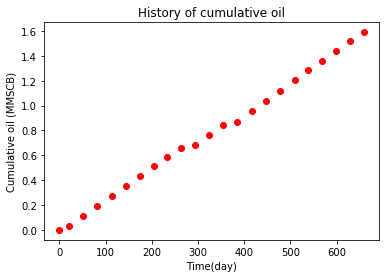

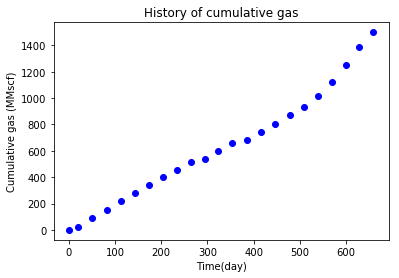

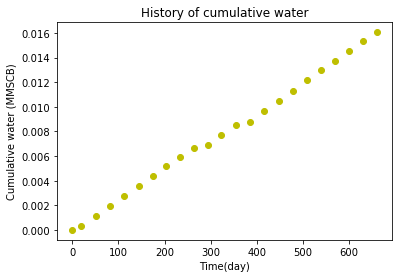

In [3]:
plt.close("all")
plt.figure(1)
fig = plt.figure()
plt.plot( all_features, all_outpouts_oil,'ro')
plt.title('History of cumulative oil')
plt.xlabel("Time(day)")
plt.ylabel("Cumulative oil (MMSCB)")
fig.savefig('D:/37-Oil_projct/oil_history.png')
plt.show()


plt.figure(2)
fig = plt.figure()
plt.plot(all_features, all_outpouts_gas, 'bo')
plt.title('History of cumulative gas')
plt.xlabel("Time(day)")
plt.ylabel("Cumulative gas (MMscf)")
fig.savefig('D:/37-Oil_projct/gas_history.png')
plt.show()

plt.figure(3)
fig = plt.figure()
plt.plot(all_features,all_outpouts_water, 'yo')
plt.title('History of cumulative water')
plt.xlabel("Time(day)")
plt.ylabel("Cumulative water (MMSCB)")
fig.savefig('D:/37-Oil_projct/water_history.png')
plt.show()


## Scaling the features:

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
all_features = all_features.values.reshape(-1, 1) # This makes the all_features an array! to be appliable to transofrm
scaler.fit(all_features)
all_features2 = scaler.transform(all_features)

C:\Users\vmoha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Splitting the data int traing and test data = 25%:

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_features2, all_outpouts_gas, test_size=0.25)

X_test = np.sort(X_test, axis=0)
X_train  = np.sort(X_train, axis=0)
y_test = y_test.sort_values(ascending=True)
y_train = y_train.sort_values(ascending=True)

## Cross Validation test to choose the degree of polynmical:

cv_Score by SVM for n = 1 is: -10338.280638926253
cv_Score by SVM for n = 2 is: -13525.973306630005
cv_Score by SVM for n = 3 is: -808.5016001836912
cv_Score by SVM for n = 4 is: -3751.684440759138
cv_Score by SVM for n = 5 is: -34442.5893730197
cv_Score by SVM for n = 6 is: -276646.75669264974


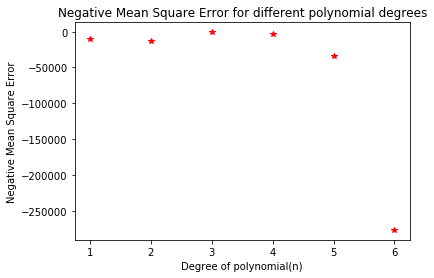

In [7]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
cv_Score_list=[]
for n in [1,2,3, 4, 5, 6]:
    poly = PolynomialFeatures(degree=n)
    X_poly = poly.fit_transform(X_train)
    clf = linear_model.LinearRegression()
    cv_scores = cross_val_score(clf, X_poly, y_train, cv =8, scoring='neg_mean_squared_error')
    print("cv_Score by SVM for n = %d is:" %n, cv_scores.mean())
    cv_Score_list.append(cv_scores.mean())
fig = plt.figure()
plt.title('Negative Mean Square Error for different polynomial degrees')
plt.xlabel("Degree of polynomial(n)")
plt.ylabel("Negative Mean Square Error")
plt.plot([1,2,3, 4, 5, 6], cv_Score_list,'r*')
fig.savefig('D:/37-Oil_projct/polynomical degree Error.png')
plt.show()

## Poly Nomial Model for degree = 5:

Coefficients: 
 [  0.         292.34288749 -14.24998985 103.34939124  27.96455776
 -17.38010429]
Mean squared error: 360.10250
Variance score: 0.99587


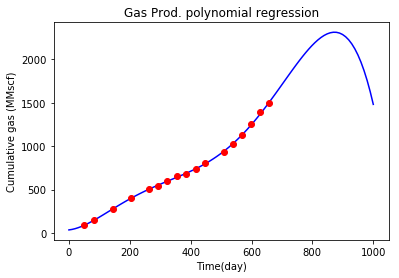

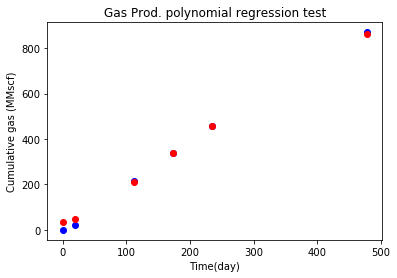

In [9]:
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X_train) 
clf = linear_model.LinearRegression()
clf.fit(X_poly, y_train)

# x polyomial
predict_ = poly.fit_transform(X_test)
clf = linear_model.LinearRegression()
clf.fit(X_poly, y_train)
y_pred2 =  clf.predict(predict_)

print('Coefficients: \n', clf.coef_)
print("Mean squared error: %.5f" % mean_squared_error(y_test, y_pred2))
print('Variance score: %.5f' % r2_score(y_test, y_pred2))

# Plot outputs for polynomical
plt.figure(4)
fig = plt.figure()
X_test_inverse = scaler.inverse_transform(X_test)
X_train_inverse = scaler.inverse_transform(X_train)

xp = np.linspace(0, 1000, 100)
xp = xp.reshape(-1, 1) 
xp_scaled = scaler.transform(xp)
Xp_poly = poly.fit_transform(xp_scaled)
y_poly =  clf.predict(Xp_poly)
plt.plot(xp, y_poly, c='b')
plt.plot(X_train_inverse, y_train, 'ro')
plt.title('Gas Prod. polynomial regression')
plt.xlabel("Time(day)")
plt.ylabel("Cumulative gas (MMscf)")
fig.savefig('D:/37-Oil_projct/gas_polynomical.png')
plt.show()

plt.figure(5)
fig = plt.figure()
plt.plot(X_test_inverse, y_test,'bo')
plt.plot( X_test_inverse,y_pred2,'ro')
plt.title('Gas Prod. polynomial regression test')
plt.xlabel("Time(day)")
plt.ylabel("Cumulative gas (MMscf)")
fig.savefig('D:/37-Oil_projct/gas_test.png')
plt.show()

### Poly Nomial Model for degree = 5:

Coefficients: 
 [  0.         302.53344691  37.45531224  68.59967653]
Mean squared error: 1837.15968
Variance score: 0.97893


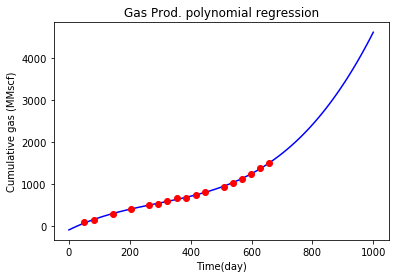

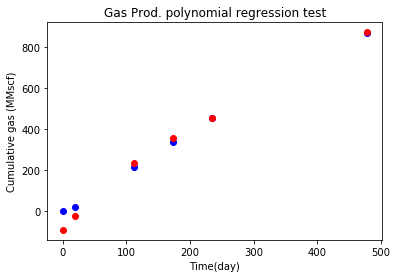

In [10]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train) 
clf = linear_model.LinearRegression()
clf.fit(X_poly, y_train)

# x polyomial
predict_ = poly.fit_transform(X_test)
clf = linear_model.LinearRegression()
clf.fit(X_poly, y_train)
y_pred2 =  clf.predict(predict_)

print('Coefficients: \n', clf.coef_)
print("Mean squared error: %.5f" % mean_squared_error(y_test, y_pred2))
print('Variance score: %.5f' % r2_score(y_test, y_pred2))

# Plot outputs for polynomical
plt.figure(4)
fig = plt.figure()
X_test_inverse = scaler.inverse_transform(X_test)
X_train_inverse = scaler.inverse_transform(X_train)

xp = np.linspace(0, 1000, 100)
xp = xp.reshape(-1, 1) 
xp_scaled = scaler.transform(xp)
Xp_poly = poly.fit_transform(xp_scaled)
y_poly =  clf.predict(Xp_poly)
plt.plot(xp, y_poly, c='b')
plt.plot(X_train_inverse, y_train, 'ro')
plt.title('Gas Prod. polynomial regression')
plt.xlabel("Time(day)")
plt.ylabel("Cumulative gas (MMscf)")
fig.savefig('D:/37-Oil_projct/gas_polynomical.png')
plt.show()

plt.figure(6)
fig = plt.figure()
plt.plot(X_test_inverse, y_test,'bo')
plt.plot( X_test_inverse,y_pred2,'ro')
plt.title('Gas Prod. polynomial regression test')
plt.xlabel("Time(day)")
plt.ylabel("Cumulative gas (MMscf)")
fig.savefig('D:/37-Oil_projct/gas_test.png')
plt.show()